<a href="https://colab.research.google.com/github/IrynaBarnych/AI18/blob/hw/AI_18_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оберіть одне завдання на вибір

# Завдання 1

За допомогою сегментації зображень замінітть фон для зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/humans.jpg

на фон з https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/forest.jpg

* отримайте маску для зображення людей, де `True` - піксель класу людини, `False` - піксель іншого класу
* зробіть зображення лісу такого ж розміру як і зображення людей
* застосуйте маску щоб змінити значення пікселів зображення лісу на пікселі зображення людей
* Якщо результат поганий можете спробувати використати маску для класу `__background`

In [ ]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision import transforms
import matplotlib.pyplot as plt

# Завантажуємо зображення
img_h = read_image("/content/humans.jpg")

# Змінюємо розмір
img_h = transforms.Resize((540, 960))(img_h)

# Завантажуємо натреновану модель
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Завантажуємо препроцесор для моделі(без зміни розмірів)
preprocess = weights.transforms(resize_size=None)

# Обробляєио забраження та змінюємо розмірність до [1, 3, width, height]
batch = preprocess(img_h)
batch = batch.unsqueeze(0)

# Робимо прогноз
with torch.no_grad():
  prediction = model(batch)["out"]

masks = prediction.argmax(dim=1)
mask = masks[0]

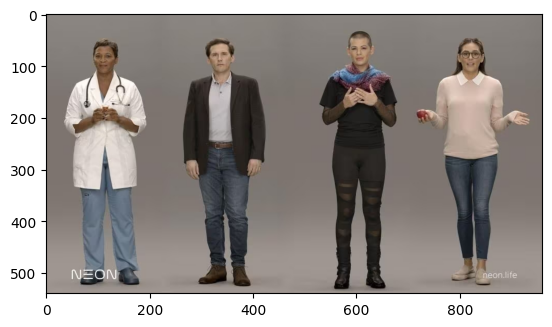

In [ ]:
import matplotlib.pyplot as plt

# Візуалізація
plt.imshow(img_h.permute(1, 2, 0))

In [ ]:
# Завантажуємо зображення
img_f = read_image("/content/forest.jpg")

# Змінюємо розмір
img_f = transforms.Resize((540, 960))(img_f)

# Завантажуємо натреновану модель
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Завантажуємо препроцесор для моделі(без зміни розмірів)
preprocess = weights.transforms(resize_size=None)

# Обробляєио забраження та змінюємо розмірність до [1, 3, width, height]
batch = preprocess(img_f)
batch = batch.unsqueeze(0)

# Робимо прогноз
with torch.no_grad():
  prediction = model(batch)["out"]

masks = prediction.argmax(dim=1)
mask = masks[0]

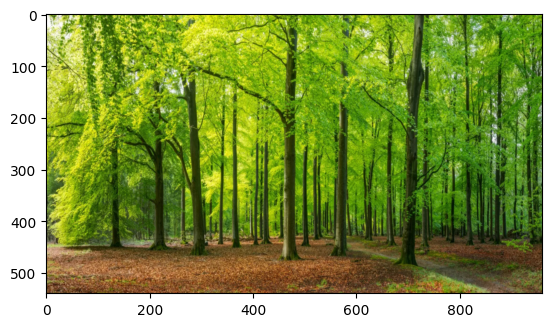

In [ ]:
import matplotlib.pyplot as plt

# Візуалізація
plt.imshow(img_f.permute(1, 2, 0))

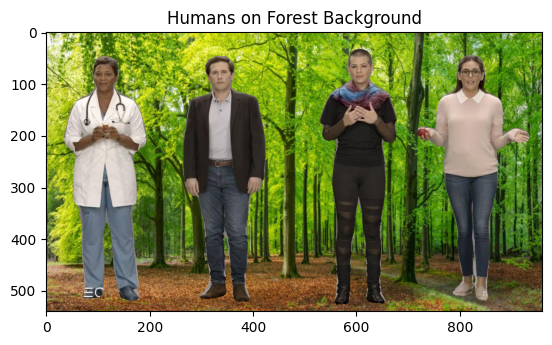

In [ ]:
# Обробка зображення людей та отримання маски людей
batch = preprocess(img_h.unsqueeze(0))
with torch.no_grad():
    prediction = model(batch)["out"]
masks = prediction.argmax(dim=1)
human_mask = masks[0]

# Вибір пікселів фону на зображенні лісу
background_mask = human_mask == 0

# Застосування маски до зображення лісу
masked_forest = img_f.clone()
for i in range(3):  # Перебираємо канали RGB
    masked_forest[i][~background_mask] = img_h[i][~background_mask]  # Замінюємо пікселі фону лісу на пікселі людей

# Візуалізація результату
plt.imshow(masked_forest.permute(1, 2, 0))
plt.title('Humans on Forest Background')
plt.show()

# Завдання 2

Проведіть детекцію об'єктів для відео

https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/Highway%20driving%20during%20the%20day%20front%20view%20camera%20driving%20plate%204k%20footage.mp4

Підберіть параметри для якісного виявлення машин та знаків
Код для перетворення набору зображень у відео є нижче

[документація](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for result in results:
    frames.append([plt.imshow(result.plot())])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('output.mp4')
plt.show()

# Завдання 3

Згенеруйте зображення на основі тексту

[документація](https://huggingface.co/docs/diffusers/using-diffusers/conditional_image_generation)